# Decision Tree Assignment

Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic dataset from Kaggle.This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

Url= https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv

titanic = pd.read_csv(url)

titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Tcket','Fare','Cabin','Embarked']

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch(Parents/children aboard), and Fare to predict whether a passenger survived.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series,DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Tcket','Fare','Cabin','Embarked']

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Tcket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch(Parents/children aboard), and Fare to predict whether a passenger survived.

In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Tcket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
input_feature = ["Pclass","Age","Sex","SibSp","Parch","Fare"]

In [6]:
x,y=titanic[input_feature],titanic["Survived"]

In [7]:
x.head()

,Pclass,Age,Sex,SibSp,Parch,Fare
0,3,22.0,male,1,0,7.2500
1,1,38.0,female,1,0,71.2833
2,3,26.0,female,0,0,7.9250
3,1,35.0,female,1,0,53.1000
4,3,35.0,male,0,0,8.0500


In [8]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

###### Data Wrangling

Identify and handle missing values

In [9]:
import missingno as msno

<Figure size 288x432 with 0 Axes>

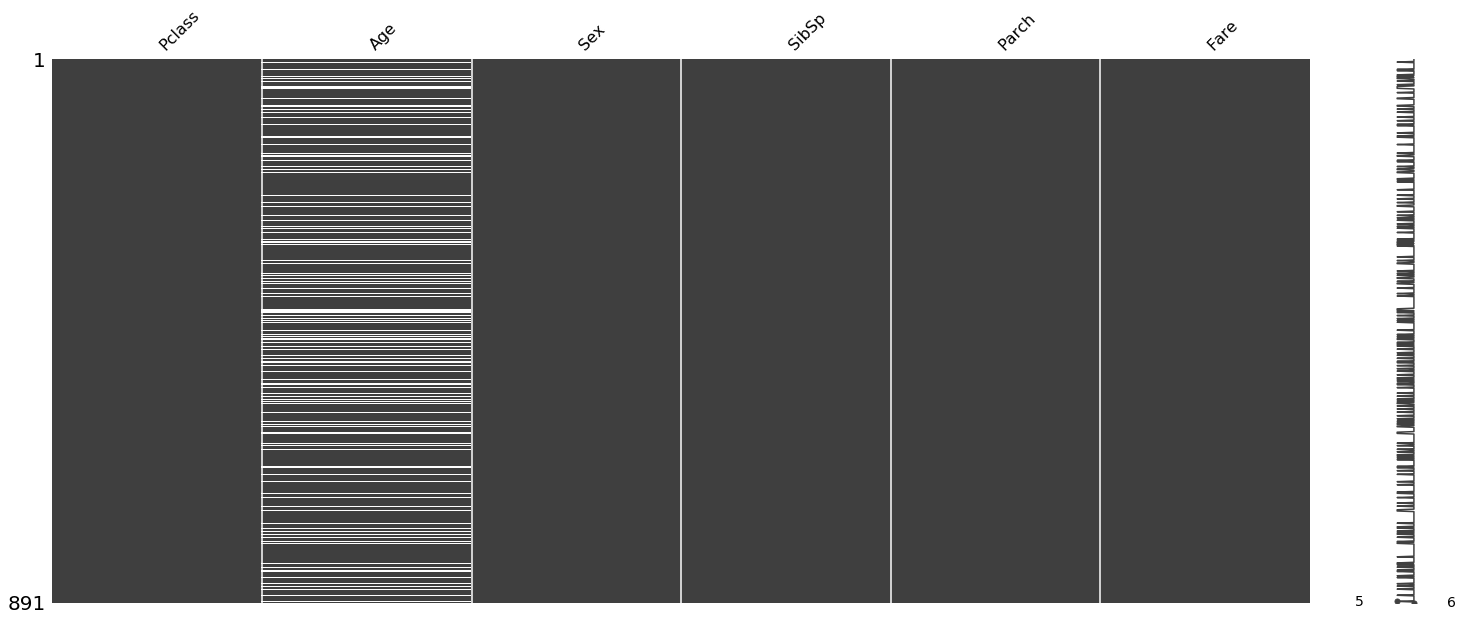

In [10]:
plt.figure(figsize=(4,6))
msno.matrix(x)

Missing values are found in coloum Age

In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass    891 non-null int64
Age       714 non-null float64
Sex       891 non-null object
SibSp     891 non-null int64
Parch     891 non-null int64
Fare      891 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.8+ KB


In [12]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
x["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [14]:
import seaborn as sns

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


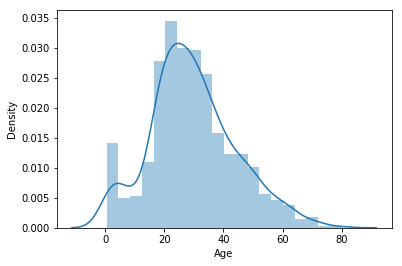

In [15]:
sns.distplot(x["Age"])

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
imputer= SimpleImputer()

In [18]:
imputed_age=imputer.fit_transform(x[['Age']])

In [19]:
x['imputed_Age']=imputed_age

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass         891 non-null int64
Age            714 non-null float64
Sex            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
imputed_Age    891 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 48.8+ KB


In [21]:
x['imputed_Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

In [22]:
x=x.drop('Age',axis=1).rename(columns={"imputed_Age":"Age"})

In [23]:
x.describe(include="all")

,Pclass,Sex,SibSp,Parch,Fare,Age
count,891.000000,891,891.000000,891.000000,891.000000,891.000000
unique,NaN,2,NaN,NaN,NaN,NaN
top,NaN,male,NaN,NaN,NaN,NaN
freq,NaN,577,NaN,NaN,NaN,NaN
mean,2.308642,NaN,0.523008,0.381594,32.204208,29.699118
std,0.836071,NaN,1.102743,0.806057,49.693429,13.002015
min,1.000000,NaN,0.000000,0.000000,0.000000,0.420000
25%,2.000000,NaN,0.000000,0.000000,7.910400,22.000000
50%,3.000000,NaN,0.000000,0.000000,14.454200,29.699118
75%,3.000000,NaN,1.000000,0.000000,31.000000,35.000000


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


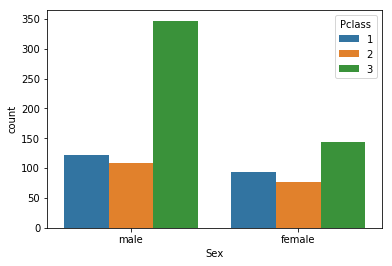

In [24]:
sns.countplot(x["Sex"],hue=x["Pclass"])
plt.show()

Above graph shows that most of the male passanger are in Pclass 3

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


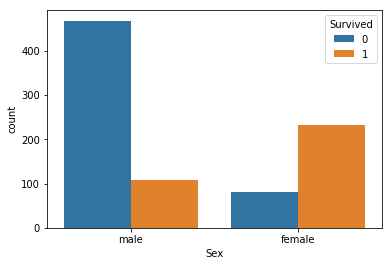

In [25]:
sns.countplot(x["Sex"],hue=y)

Above graphs shows that the death count of male passanger is more when compared to female

###### Proporation of male and female dataset

In [26]:
gender_count=x.groupby(by=["Sex"]).count().loc[['female','male'],['Pclass']].values

In [27]:
gender_label=x.groupby(by=["Sex"]).count().loc[['female','male'],['Pclass']].index

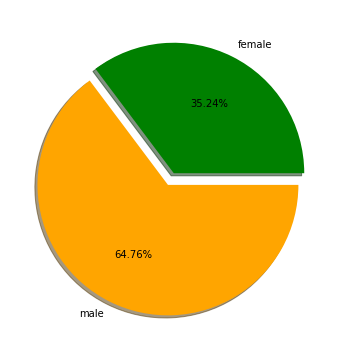

In [28]:
plt.figure(figsize=(8,6))
plt.pie(gender_count.flatten(),labels=gender_label,explode=[0,0.1],shadow=True,autopct="%.2f%%",colors=['green','orange'])
plt.show()


###### Percentage calculation

In [29]:
total_gender_count=dict(x["Sex"].value_counts())
total_gender_count

{'male': 577, 'female': 314}

###### Death count based on gender

In [30]:
total_gender_death_count=dict(x[y==0]["Sex"].value_counts())
total_gender_death_count

{'male': 468, 'female': 81}

In [31]:
male_death_percentage=total_gender_death_count["male"]*100/total_gender_count["male"]
female_death_percentage=total_gender_death_count["female"]*100/total_gender_count["female"]

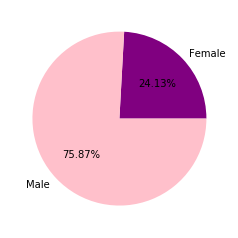

In [32]:
plt.pie([female_death_percentage,male_death_percentage],labels=["Female","Male"],autopct="%.2f%%",colors=["purple","pink"])
plt.show()

Above chart shows that death of male is 75.87% whereas female is 24.13%, that is the male death is more than female.

###### Finding the Pclass in which male passanger death occured most 

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


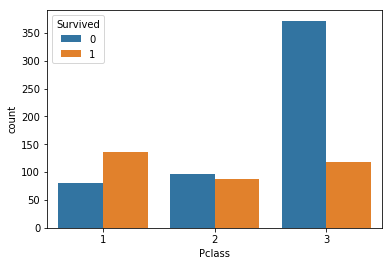

In [33]:
sns.countplot(x["Pclass"],hue=y)

In [34]:
x.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age'], dtype='object')

In [35]:
x["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
label=LabelEncoder()

In [38]:
x.Sex=label.fit_transform(x.Sex)

In [39]:
x.head()

,Pclass,Sex,SibSp,Parch,Fare,Age
0,3,1,1,0,7.2500,22.0
1,1,0,1,0,71.2833,38.0
2,3,0,0,0,7.9250,26.0
3,1,0,1,0,53.1000,35.0
4,3,1,0,0,8.0500,35.0


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
data_classification=DecisionTreeClassifier()

In [66]:
data_classification.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
data_classification.score(x_train,y_train)

0.9803370786516854

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
cross_val_score(data_classification,x_train,y_train,cv=5).mean()

0.7500443218753078

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
grid_param={
    'max_depth':range(2,10),
    'max_leaf_nodes':range(2,15),
    'min_samples_split':range(2,15),
    'min_samples_leaf':range(2,15)
}

In [49]:
grid_search=GridSearchCV(estimator=data_classification,param_grid=grid_param,cv=5)

In [54]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 10),
                         'max_leaf_nodes': range(2, 15),
                         'min_samples_leaf': range(2, 15),
                         'min_samples_split': range(2, 15)})

In [59]:
grid_search.best_score_

0.8244262779474048

In [60]:
grid_search.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [61]:
classification=DecisionTreeClassifier(max_depth=5,max_leaf_nodes=14,min_samples_leaf=4,min_samples_split=12)

In [62]:
classification.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=14, min_samples_leaf=4,
                       min_samples_split=12)

In [63]:
classification.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=14, min_samples_leaf=4,
                       min_samples_split=12)

###### Test score before tuning the hyperparameters

In [64]:
data_classification.score(x_test,y_test)

0.7597765363128491

###### Test score after tuning the hyperparameters

In [65]:
classification.score(x_test,y_test)

0.8044692737430168